# Figures

Two types of error
1. parameter -> diffusion
2. model -> PNP vs. membrane capacitor

- (Figure /: Comparison of the two models: Classical and realistic model and real spines) -> not needed
- FIgure 1: Homogenization Methods
- Figure 2: Homogenization Results
- Figure 3: PNP-algorithm and a specific solution
- Figure 4: DIfference between "classical" capacitor model and PNP-solution -> and Double layer and charge distributions, electric field
- Figure 5: Resitance and capacitance (as function of radius, membrane voltage and permittivity)
- Figure 6: individual ion-concentrations Na, K, Ca, Cl and also ion-concentration profiles when ion-conctraions change due to accumulation after EPSP

- (Figure 6: Effect of time dependence -> find a simplified description that allows accurate analysis in time)

# Motivation / Introduction

- Cartailler papers
- our actin structure paper
- high variance in compartmentalization papers (e.g. tonnesen and nägerl)


# Are all assumptions of the cable theory fullfilled in small neural compartments like dendritc spines in steady state?

We compare two models:

1. Classical model (cable theory): 

    - the intra- and extracelluarl space is isotrop and void of any macro-molecular structures
    - charge distribuions are isotrop
    - the membrane is uncharged
    - the membrane behaves as an ideal capacitor with c = 1 \mu F / cm^2
    - the membrane potetial drops completely across the membrane   
    - all excess charges contribute to charge the capacitor
    - the intracellular and extracellular space is elcetoneutral (except capacitor charges)
    - intracellular resitance is ohmic and isotrope
    - the extracellular resistance is zero
    
    
2. realistic electrodiffusion model

    - the intracellular space is full of macromolecules and cytosceletal structures
    - the cell membrane carries a negtive surface charge on both sides -0.02 C/m^2
    - charge distribution is given by electrodiffusion
    

# Numerical solution of homogenized PNP-equations to test validity of cable theory in small neural compartments!

1. Effect of macromolecules in the intracellular and extracellular space
    
    - homogeniazation of the PNP-equations
    - what is the effect on the diffusion constant?
    - what is the effect on the permittivity?

2. Electroneutrality
    - answer if intracelluar and extracelluar space are electroneutral
    - answer if the membrane potential only drops across the membrane
    - Double layer size as function of radius, domain type and membrane voltage


3. Excess charges
    - what is the effect of membrane charges?
    - Excess charges as function of membrane charge
    - charges to depolarize membrane (0 mV vs. -70 mV)
    - excess charge vs. total free charge (is considerable amount of charges uncompensated?)


4. Axial resitance 
    - inverse proportional to radius 
    - function of membrane voltage
    - resistance lower at membrane -> number of charges in debye layer


5. Capacitance
    - function of membrane charge or radius

6. Sodium Potassium and Calcium concentrations


7. Including time
    - Quasi-static in transient events?
    - which analytic function is a good approximation of the solution?
    - change of sodium concentration?


In [1]:
import numpy as np
import gmpy2
import gmpy2.gmpy2
from gmpy2 import mpfr
import copy
import pickle
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
import matplotlib.image as mpimg
import matplotlib.lines as mlines

# custom made packages
from sys import path
path.append('./../')
import src as pnp
import src.constants as constants

#SpineHead = pnp.SpineHead
#SpineNeck = pnp.SpineNeck

# IMPORTANT:
export JUPYTER_PATH=/home/work/.conda/envs/mpfr_env/bin/python

and
conda activate mpfr_env

In [2]:
import sys
sys.version, sys.executable

('3.8.2 | packaged by conda-forge | (default, Apr 24 2020, 08:20:52) \n[GCC 7.3.0]',
 '/home/work/.conda/envs/mpfr_env/bin/python')

# load results

In [3]:
df = pnp.load_parameter_overview()
df

found files:  ['results_test_run1.pcl', 'results_test_run0.pcl', 'results_test_run2.pcl', 'results_test_run6.pcl', 'results_test_run7.pcl', 'results_test_run5.pcl', 'results_test_run11.pcl', 'results_test_run10.pcl', 'results_test_run3.pcl']
open : /home/work/Projects/spineIonConcentrations/results/results_test_run1.pcl


,domain,membrane_potential,d_phi_in,d_phi_ext,d_phi_in_min,d_phi_in_max,d_phi_ext_min,d_phi_ext_max,r_in,r_mem,...,chem_f_pos_in,chem_f_pos_ext,chem_f_neg_in,chem_f_neg_ext,pnp_lhs_in,pnp_lhs_ext,pnp_rhs_in,pnp_rhs_ext,date,experiment_id
experiment_id,,,,,,,,,,,,,,,,,,,,,
0,head,-0.071,-7.4989241420280345176255633782207231705843838...,-0.0257889874913037091958001312264059379231184...,-1.2618984341147823288742380043458979343995451...,-7.4256878542530106029895264896367734763771295...,-4.4627299448781386106597534944921154270610540...,-0.0259965313910217337214914046228386723669245...,2.000000e-08,2.500000e-08,...,-3.975788e+07,9.002236,3.975791e+07,-3.975788e+07,0.0,0.0,0.0,0.0,2020-08-28 15:05:47.884220,0
1,head,-0.070,-7.5017200047959541478591963381282518359479715...,-0.0257810129295329360649136063443620514590293...,-1.2618984341147823288742380043458979343995451...,-7.4285358617383247942234092420221713837236166...,-4.4627299448781386106597534944921154270610540...,-0.0259885085857113855636879584665166476042941...,2.000000e-08,2.500000e-08,...,-3.977957e+07,8.952676,3.977960e+07,-3.977957e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:27.925538,1
2,head,-0.069,-7.5045147544015075417197046774637506981999073...,-0.0257730377401511164675573795079799310769885...,-1.2618984341147823288742380043458979343995451...,-7.4313827170506118607873347059467050712555646...,-4.4627299448781386106597534944921154270610540...,-0.0259804851551189085537285627935943921329453...,2.000000e-08,2.500000e-08,...,-3.980126e+07,8.451528,3.980129e+07,-3.980126e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:22.738278,2
3,head,-0.036,-7.5961173766653066741859056751673863312399113...,-0.0255095149378398295542114126988053612876683...,-1.2618984341147823288742380043458979343995451...,-7.5246866711330909899269059337711951229721307...,-4.4627299448781386106597534944921154270610540...,-0.0257153614872918297520887342955120402621105...,2.000000e-08,2.500000e-08,...,-4.051649e+07,11.624314,4.051652e+07,-4.051649e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:27.125418,3
4,head,-0.035,-7.5988743433346827662842673005640079819483675...,-0.0255015192811233155217864876362909853924065...,-1.2618984341147823288742380043458979343995451...,-7.5274947243752967501739803424243291374295949...,-4.4627299448781386106597534944921154270610540...,-0.0257073168267753731849878384707608347525820...,2.000000e-08,2.500000e-08,...,-4.053815e+07,6.228888,4.053818e+07,-4.053815e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:28.366764,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,neck,0.000,-1.7295675971588218670926817566169120254926383...,-0.02531717531383037567138671875,-2.8061802498996257781982421875000000000000000...,-1.7141205258667469024658203125000000000000000...,1.92545223133591157379967091599191587252594544...,-0.0255279188975691795349121093749999999999999...,1.000000e-08,1.500000e-08,...,-4.130112e+07,-94239.868685,4.130115e+07,-4.130112e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:30.471610,139
140,neck,0.001,-1.7301877113695784786429054946665928582660853...,-0.0253086615353822708129882812499999999999999...,-2.8061802498996257781982421875000000000000000...,-1.7147333361208438873291015625000000000000000...,1.92545223133591157379967091599191587252594544...,-0.0255196062847971916198730468749999999999999...,1.000000e-08,1.500000e-08,...,-4.132311e+07,23029.412158,4.132314e+07,-4.132311e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:27.872728,140
141,neck,0.034,-1.7499060046580965956108943970548352808691561...,-0.02503578551113605499267578125,-2.8061802498996257781982421875000000000000000...,-1.7348212189972400665283203125e-06,1.92545223133591157379967091599191587252594544...,-0.025244918651878833770751953125,1.000000e-08,1.500000e-08,...,-4.202657e+07,17309.778803,4.202661e+07,-4.202657e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:30.486039,141


# How to search for specific solutions

In [6]:
# search for solution that match certain criteria

param_dict = {'membrane_potential': -0.07, 'domain': 'neck', 'r_in': 2e-8}
ids = pnp.search_index(df, param_dict)
print(ids)

param_dict = { 'domain': 'neck', 'r_in': 2e-8}
ids = pnp.search_index(df, param_dict)
print(df.loc[ids, 'membrane_potential'])

Int64Index([61], dtype='int64', name='experiment_id')
experiment_id
60   -0.071
61   -0.070
62   -0.069
63   -0.036
64   -0.035
65   -0.034
66   -0.001
67    0.000
68    0.001
69    0.034
70    0.035
71    0.036
Name: membrane_potential, dtype: float64


In [7]:
# output summary for a solution

# load solution of a parameter set
dom_id = 1
domain_tmp = pnp.load_domain_from_df(df, dom_id)
# df.loc[dom_id] # <- to output everything
df.loc[dom_id, ['domain', 'membrane_potential', 'r_in']]

domain                 head
membrane_potential    -0.07
r_in                  2e-08
Name: 1, dtype: object

# Depolarization effects

Anser:
- Does depolarization of the membrane affect concentration profiles? 
- How does to electric potential profile change as a function of membrane potential?

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


domain                 neck
membrane_potential    -0.07
r_in                  2e-08
Name: 61, dtype: object


domain                 neck
membrane_potential    0.035
r_in                  2e-08
Name: 70, dtype: object


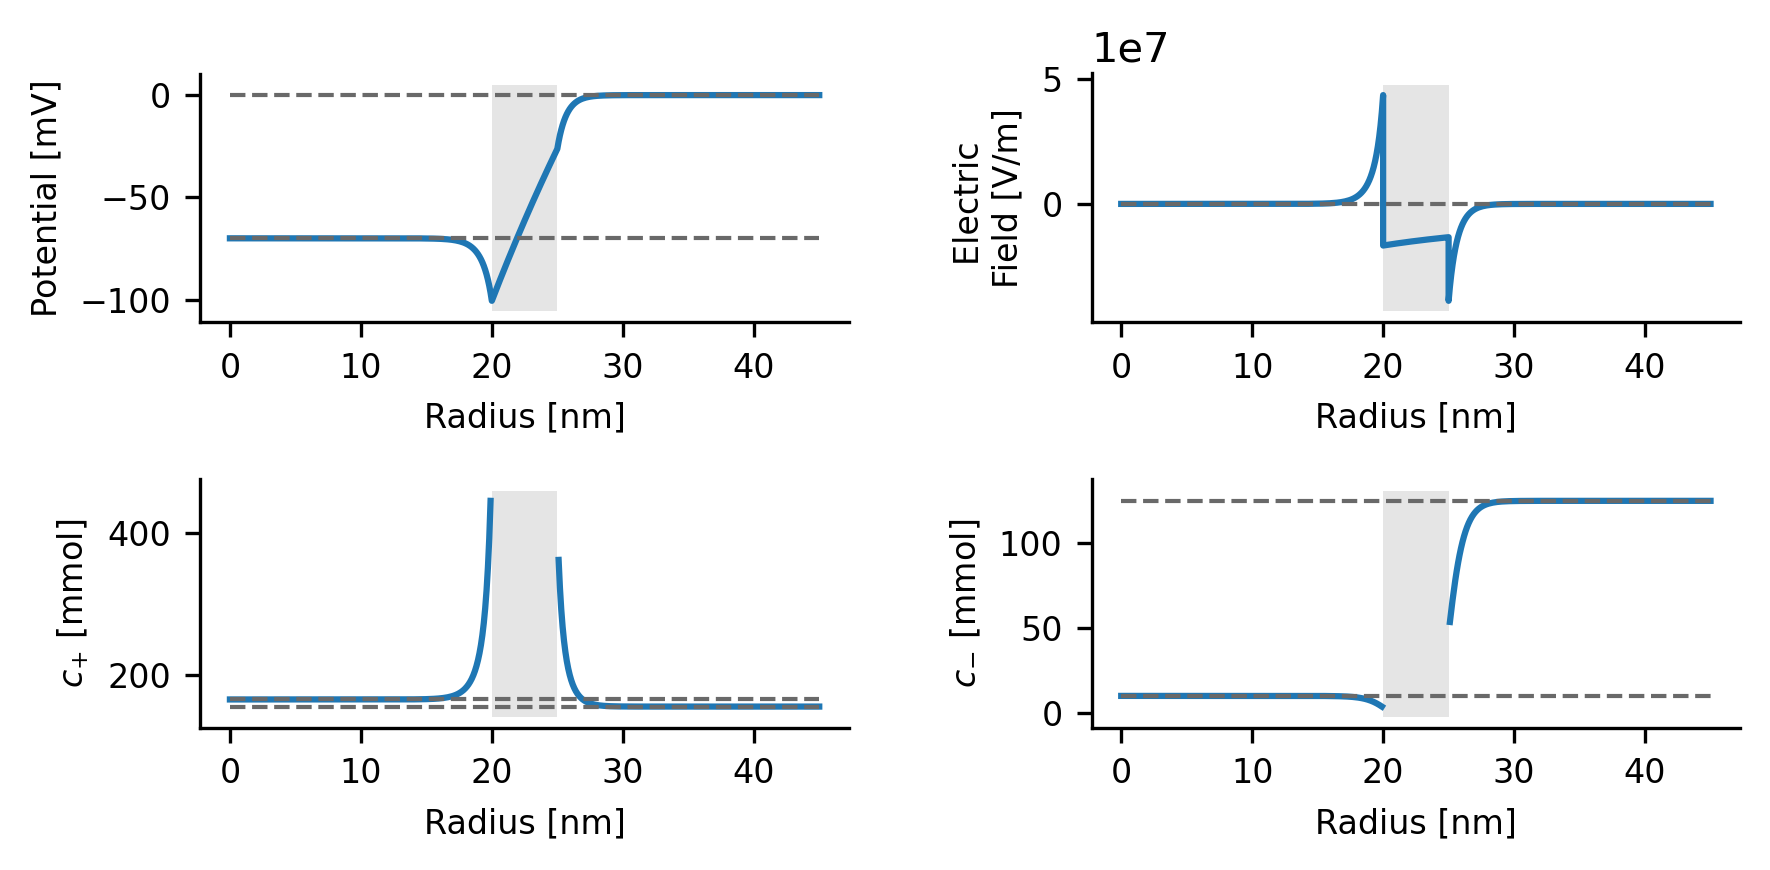

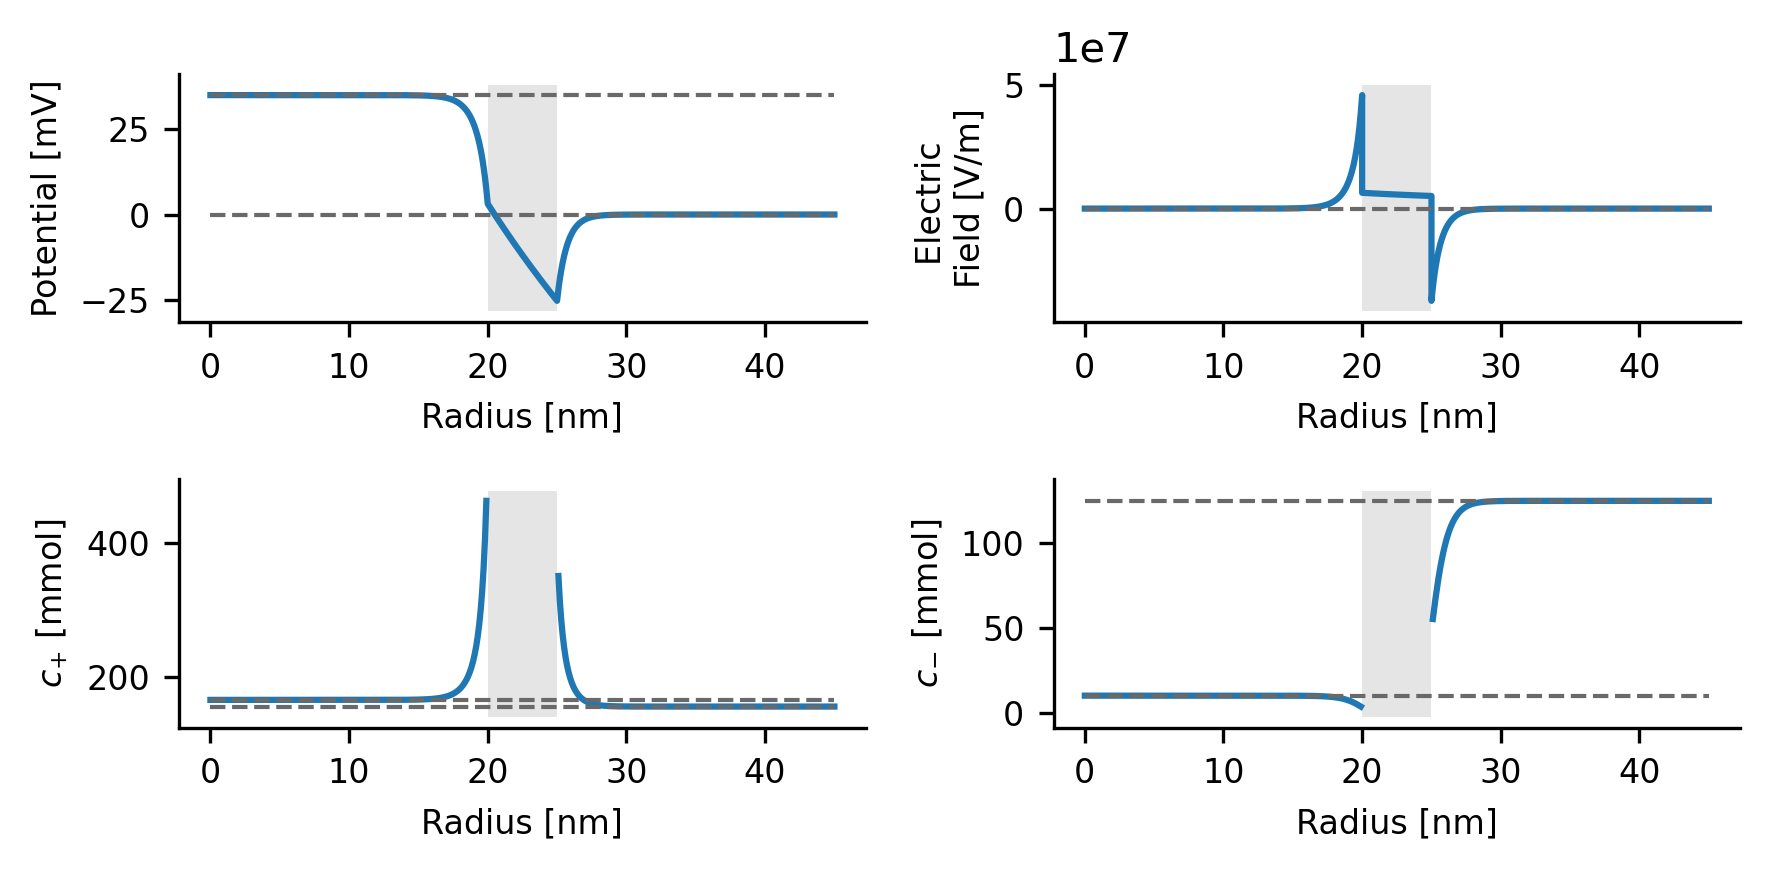

In [6]:
index1 = 61
solution1 = pnp.load_domain_from_df(df, index1)
print(df.loc[index1, ['domain', 'membrane_potential', 'r_in']])
print('\n')
index2 = 70
solution2 = pnp.load_domain_from_df(df, index2)
print(df.loc[index2, ['domain', 'membrane_potential', 'r_in']])

pnp.plot_domain_overview(solution1, mask_extracellular_space=False)
pnp.plot_domain_overview(solution2, mask_extracellular_space=False)

In [8]:
r_1 = solution1.get_grid_points()
v_mem_1 = solution1.get_electric_potential() * 1000.
c_pos_1 = solution1.get_concentration_positive()
c_neg_1 = solution1.get_concentration_negative()
c_back_1 = solution1.get_concentration_background()

r_2 = solution2.get_grid_points()
v_mem_2 = solution2.get_electric_potential() * 1000.
c_pos_2 = solution2.get_concentration_positive()
c_neg_2 = solution2.get_concentration_negative()
c_back_2 = solution2.get_concentration_background()

np.all(r_1 == r_2)

True

# Uniformity of current flow

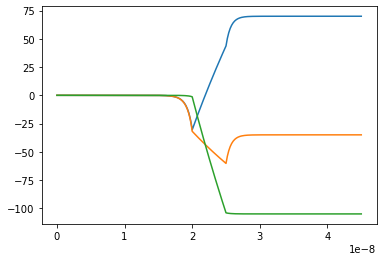

In [9]:
v_diff = v_mem_2 - v_mem_1
plt.plot(r_1,v_mem_1)
plt.plot(r_1, v_mem_2)
plt.plot(r_1,v_diff)

<ipython-input-11-64e1a1d78510>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(c_pos_diff/c_pos_2)


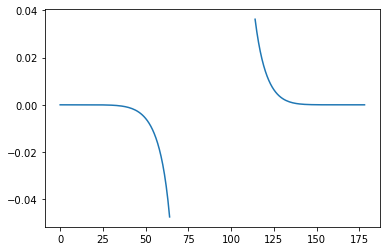

In [11]:
c_pos_diff = c_pos_1 - c_pos_2
#plt.plot(c_pos_1)
#plt.plot(c_pos_2)
plt.plot(c_pos_diff/c_pos_2)

# Figure 5

## Double-layer size and Debye length
In classical cable theory the the membrane potential fully drops across the membrane capacitance and the intacellular space is electroneutral.

This assumption is usually correct because the debye-lenght which measures at which distance to the membrane the potential drops to 1/e of the surface potential is very small in neural tissue; ~ 1 nm in comparison to the size of dendrites r=? or cell bodies r=?.

But in studies that exmined the special case of non-electroneutral states and computed excess charge distributions is was shown that the specific geometry of small neural compartments has a strong effect on the charge distributions and leads to a considerable voltage drop in the intracellular space. 

It is not clear if in a setup with realistic ion-concentrations the geometry has an effect on the ion-concentrations. Therefore we measure the double layer size as a function of radius, membrane voltage permittivity and ion-concentrations. We measure the lenght where the filed drops to 1/e of the field at the membrane and compare it to the standrard Debye length as a function of the radius.


ALTERNATIVE:

In classical cable theory the the membrane behaves as capacitance and the electric potential drops only across the membrane. In recent studies that study distributions of excess charges it was found that the distribution of the charges can depend on the geometry of the neural compartment especially when strongly curved. And when only excess charges are considered a large fraction of the potential drops in the intracellular space. Therefor we measure the distance to the membrane at which the intracelluarl potential drop is 1/e of the total intracelluar potential drop similar to the definiton fo the debye length.

./../src/figures.py:70: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax.fill_between(x, y_dl_min, y_dl_max, 'kx', color=colors[n], alpha = 0.3, label='Double Layer\n(numerical boundaries)')
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


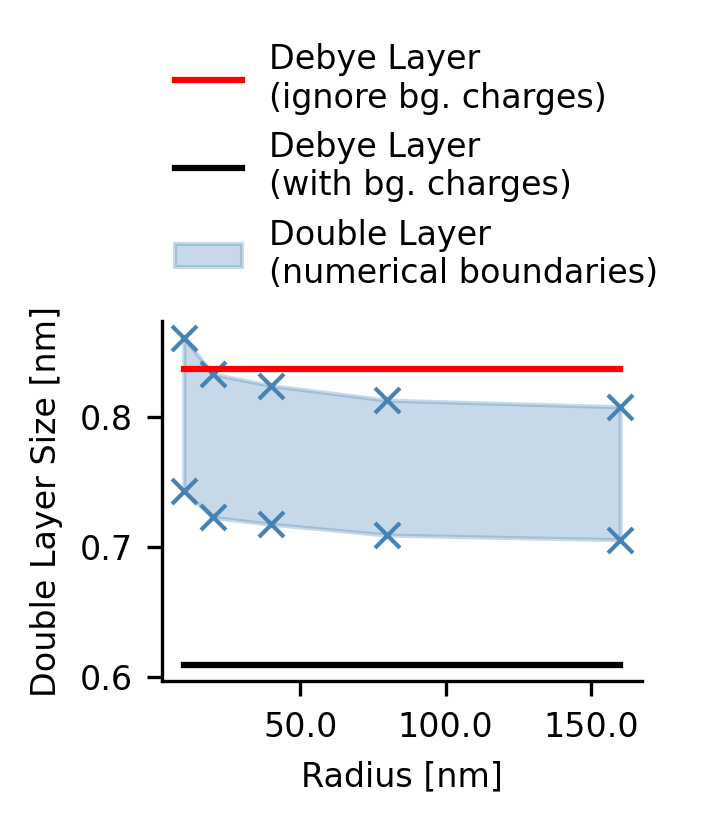

In [4]:
fig = plt.figure(figsize=(2,1.5), dpi=300)
pos = [0.1,0.1, 0.8,0.8]

param_dict = {'membrane_potential': -0.07}
ids = pnp.search_index(df, param_dict)
df_dl = df.loc[ids] 
pnp.plot_double_layer_size(fig, pos, df_dl, x_axis='radius')

plt.show()

## Excess charge for different voltages are always positive on both sides

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


[25 34]
experiment_id
25    1.650000e-07
34    1.650000e-07
Name: r_ext, dtype: float64
experiment_id
25    1.650000e-07
34    1.650000e-07
Name: r_ext, dtype: float64


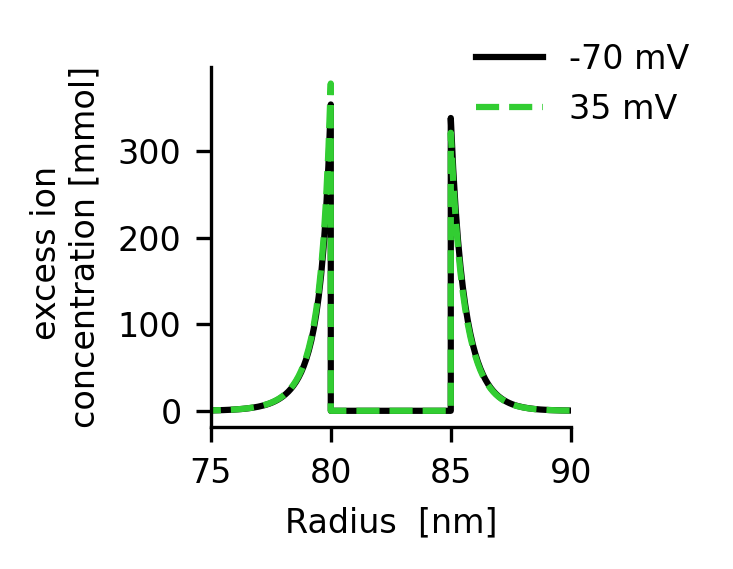

In [5]:


id1 = pnp.search_index(df, {'r_in': 80e-9, 'membrane_potential':-0.07, 'domain': 'head'})
id2 = pnp.search_index(df, {'r_in': 80e-9, 'membrane_potential':0.035, 'domain': 'head'})

ids = np.concatenate((id1 , id2))
print(ids)
df_dl = df.loc[ids] 

fig = plt.figure(figsize=(1.5,1.5), dpi=300)

pnp.plot_excess_charge_distributions(fig, [0.1,0.1,0.8,0.8], df_dl, ids)

plt.show()



## Potential drop evoked by Membrane Charge
The inner side of the membrane is charged. Whithout charges in the intracelluluar and extracellular domain the membrane charges alone evoke a potential drop across the membrane. We take the thickness of them membrane to 10 nm and assume a  relative electric permittivity of 5 inside the membrane. Then we compute the potential drop across the membrane as a function of the membrane charge for spherical domains with a radius of 20, 60, 180, 540 and 1120 nm and 1.62 mum.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


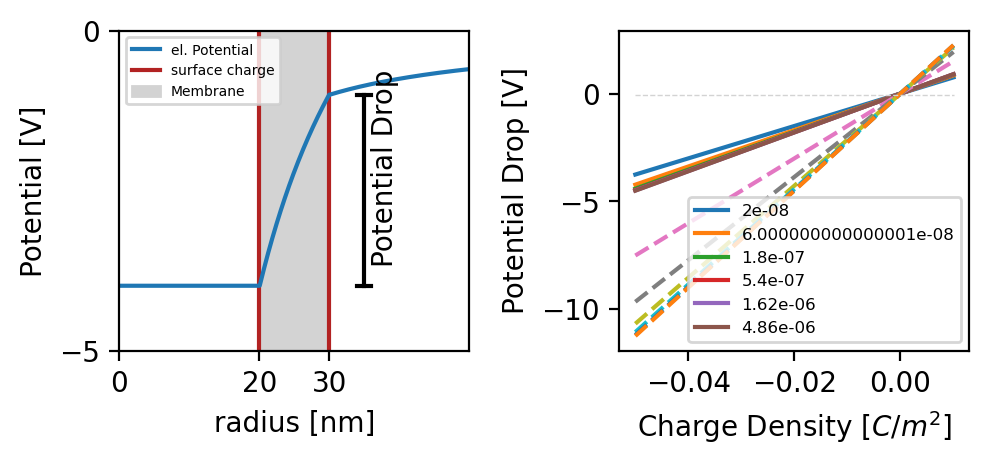

In [6]:
#reload(fgs)

fig = plt.figure(figsize=(5,2), dpi=200)

pos1 = [0.1, 0.1, 0.35, 0.8]
pos2 = [0.6, 0.1, 0.35, 0.8]
pnp.potential_drop_through_membrane_charge(fig, pos1, pos2)
#fgs.potential_drop_through_membrane_charge(fig, pos1, pos2)

plt.show()

The the relevant regime around -0.02 F/m^2 the inner membrane charge evokes a potential around -4 V across the membrane. Therefor in a case where the intracellular domain is electroneutral and only positive charges in the extracellaular space compensate for the membrane charges, in a way that global electroneutrality in ensured the measured membrane potential is at least as high as the potential drop across the membrane. The reason is that in a sphereical domain charges in a region with radius larger than R can not have an effect on the elctric field in a region with radius smaller than R. In order to set to membrane potential to a value aroun -0.07 V (dotted light gray line) there has to be an excess of positive charges in the intracellular domain.

Depending on the chosen parameters the results can vary considerably.

## Electric field inside cell membrane is function of the membrane voltage

A large fraction of the electric current in synapses is mediated by AMPAR-channels. Calcium flows thorough NMDAR-channels and AMPAR-channels. The electric field inside the membrane changes as a function of membrane potential and may support or hinder Ca2+ influx. The ion-concentration, potential and e-field profiles close to the membrane are different from that of a plate capacitor. Comparte field in membrane and potential drop across membrane for both models.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


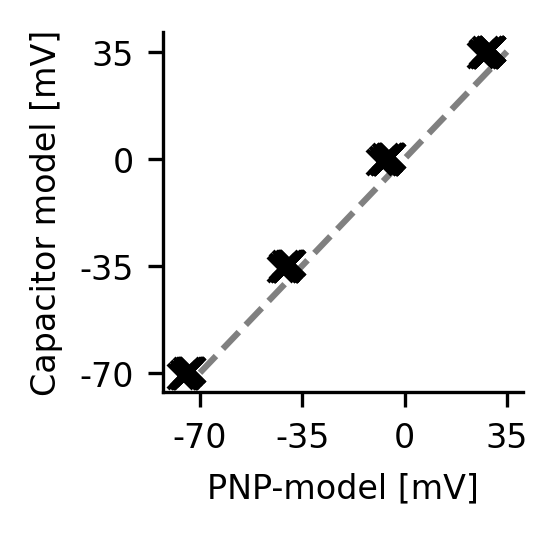

In [5]:

    

fig = plt.figure(figsize=(1.5,1.5), dpi=300)

pnp.plot_v_mem_cap_vs_pnp(fig, [0.1,0.1, 0.8,0.8], df)

plt.show()

## Reminder: Physiological charge concentrations
Space-charge neutrality holds for most parts of living bodies the only exception is close to the cell membrane due
to speration of charges and the membrane potential.


             cell        blood
    K+	   139	       4
    Na+	   12	     145
    Cl−	    4	     116
    HCO3−     12	      29
    X−	   138	       9
    Mg2+       0.8	     1.5
    Ca2+	  <0.0002	  1.8
https://www.ncbi.nlm.nih.gov/books/NBK21627/

## Excess charge
In a simple capacitor model the membrane is charged at -70 mV in resting state. The membrane capacitance can be approximated as 1 \mu F / cm^2. To charge this a spherical neural compartment e.g. a large spine head t ## elementary charges are transferred. In such a model there are positive excess charges on the extracellular side of the membrane and negative charges on the intracellular side of the membrane. However in this case membrane charges are neglected and the situation changes fundamentally when membrane charges are considered. Typical charge density on biological cell membranes is -0.02 C/m^2 on both sides. These charges also contribute to the membrane voltage. A simple calculation for spherical neural compartments visualizes the importance of the membrane charges. We assume a special case without any charges in the extracellular and the intacellular domain with only negative membrane charges beeing present. In this case the membrane charges alone cause a voltage drop of several volts across the membrane. Negative excess charges in the intracelluar space would further increase the voltage drop. Therefore it is reasonable to assume positive excess charges on both sides of the membrane that compensate the negative membrane charges. 

## Membrane charge vs. intracellular charge
Positive excess charges are needed to compensate for the negative surface charges on the membrane. In a depolarized state the we assume a membrane potential of 0 mV. In this case the intracellular space including the inner leaflets of the membrane have to be electroneutral i.e. the sum of all charges has to be 0. In this state we compare the total membrane charge (represented as number of elementary charges) to the total number of charges (approx. 300 mmol), to free charges (approx. 150 mmol). The number of excess charges has to be similar to the number of membrane charges

## Charges on membrane capacitor
To produce a fixed potential across the membrane a certain number of uncompensated ions on each side of the membrane capacitor is required.
How many uncompensated charges on each side of the membrane are needed in spherical cell with radius R and
membrane capacitance 1 muF / cm^2 = 0.01 F/m^2 to produce a membrance potential of 70 mV?

Remark: In a depolarized state the membrane potential could change sign and the excess charges could the be kations instead of anions.


double layer size:  7.776346067283613e-10
double layer size:  7.705719381484895e-10
double layer size:  7.607769563500375e-10
double layer size:  7.564702234645311e-10


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


double layer size:  8.017854898153856e-10


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


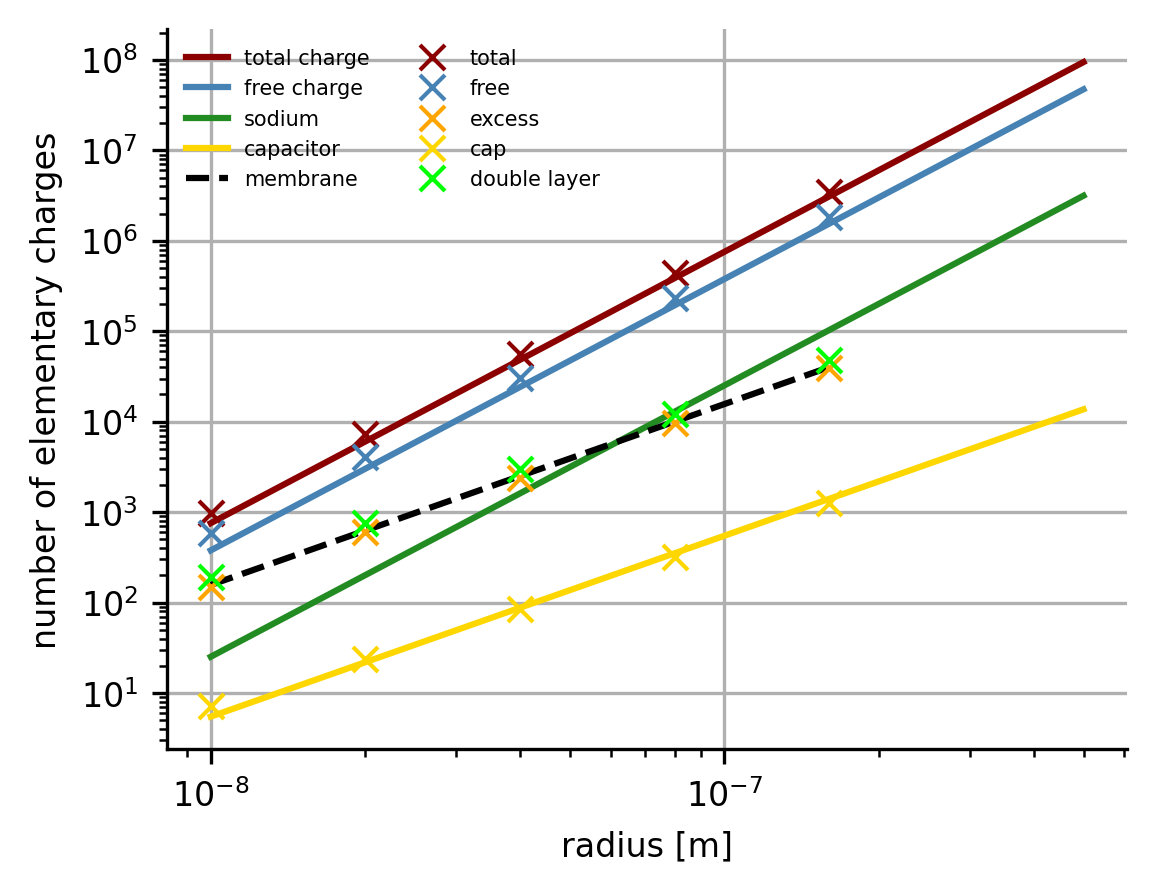

In [4]:
param_dict = {'membrane_potential': -0.07, 'domain': 'head'}
ids = pnp.search_index(df, param_dict)    


param_dict = {'membrane_potential': -0.07, 'domain': 'head'}
param_dict_depol = {'membrane_potential': 0.0, 'domain': 'head'}

ids = pnp.search_index(df, param_dict)
cap_ids = pnp.search_index(df, param_dict_depol)
all_ids = np.concatenate((ids, cap_ids))

df_tmp = df.loc[all_ids]


fig = plt.figure(figsize=(4,3), dpi=300)
pos = [0.1, 0.1, 0.8, 0.8]
pnp.number_of_charges_vs_radius(fig, pos, df_tmp)

plt.show()

In [5]:
constants.keys()
i = 23.e-12 # 23pA synatptic current
t = 10.e-3  # 10ms time window for synaptic current
n_sys = i * t / constants['e']
float(n_sys/1.e5)

14.357053682896382

## Interpretaion of figure

charges are scale seperated

The capacitance charge has an extremely weak effect on the total charge and the charge distributions. Even in a depolarized state there is a depletion of negative charges at the boundary due to the membrane charge.The membrane potential has no effecto on the boundary layer -> contradiction to the simple model but has functionally no effect on cable theory. The concentrations and their profiles are very stable.

Effect of membrane charge positive ions are attracted to the membrane negative ions are rejected. Might incrase the availabilty of sodium and potassium for the ion channels.

From old figure:

For ar radius below 50 nm the number of elementary charges on the membrane is more than 10 % than the total number of free elementary charges in the intracellular space (membran charge density -0.02 C/m^2). The number of elementary charges on the membrane is comparable to the number of sodium ions.

However a higher surface charge density (-0.04 C/m^2) was found in: 
    
    Mapping surface charge density of lipid bilayers by quantitative surface conductivity microscopy
    Lasse Hyldgaard Klausen, Thomas Fuhs & Mingdong Dong
    
Important: The number of ions to compensate the membrane charge is much higher then the number of charges as expected from a capacitor model (factor ~30 for -0.02 C/m^2). Moreover in a capacitor model there is an excess of negative charges intracelluar but considering the membrane charge there should be an excess of positive charges in the cytosol.

# Figure 5

<ipython-input-105-af7c2b2597bc>:65: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax.fill_between(x, y_dl_min, y_dl_max, 'kx', color=colors[n], alpha = 0.3, label='Double Layer\n(numerical boundaries)')


experiment_id
25    1.650000e-07
34    1.650000e-07
Name: r_ext, dtype: float64
experiment_id
25    1.650000e-07
34    1.650000e-07
Name: r_ext, dtype: float64


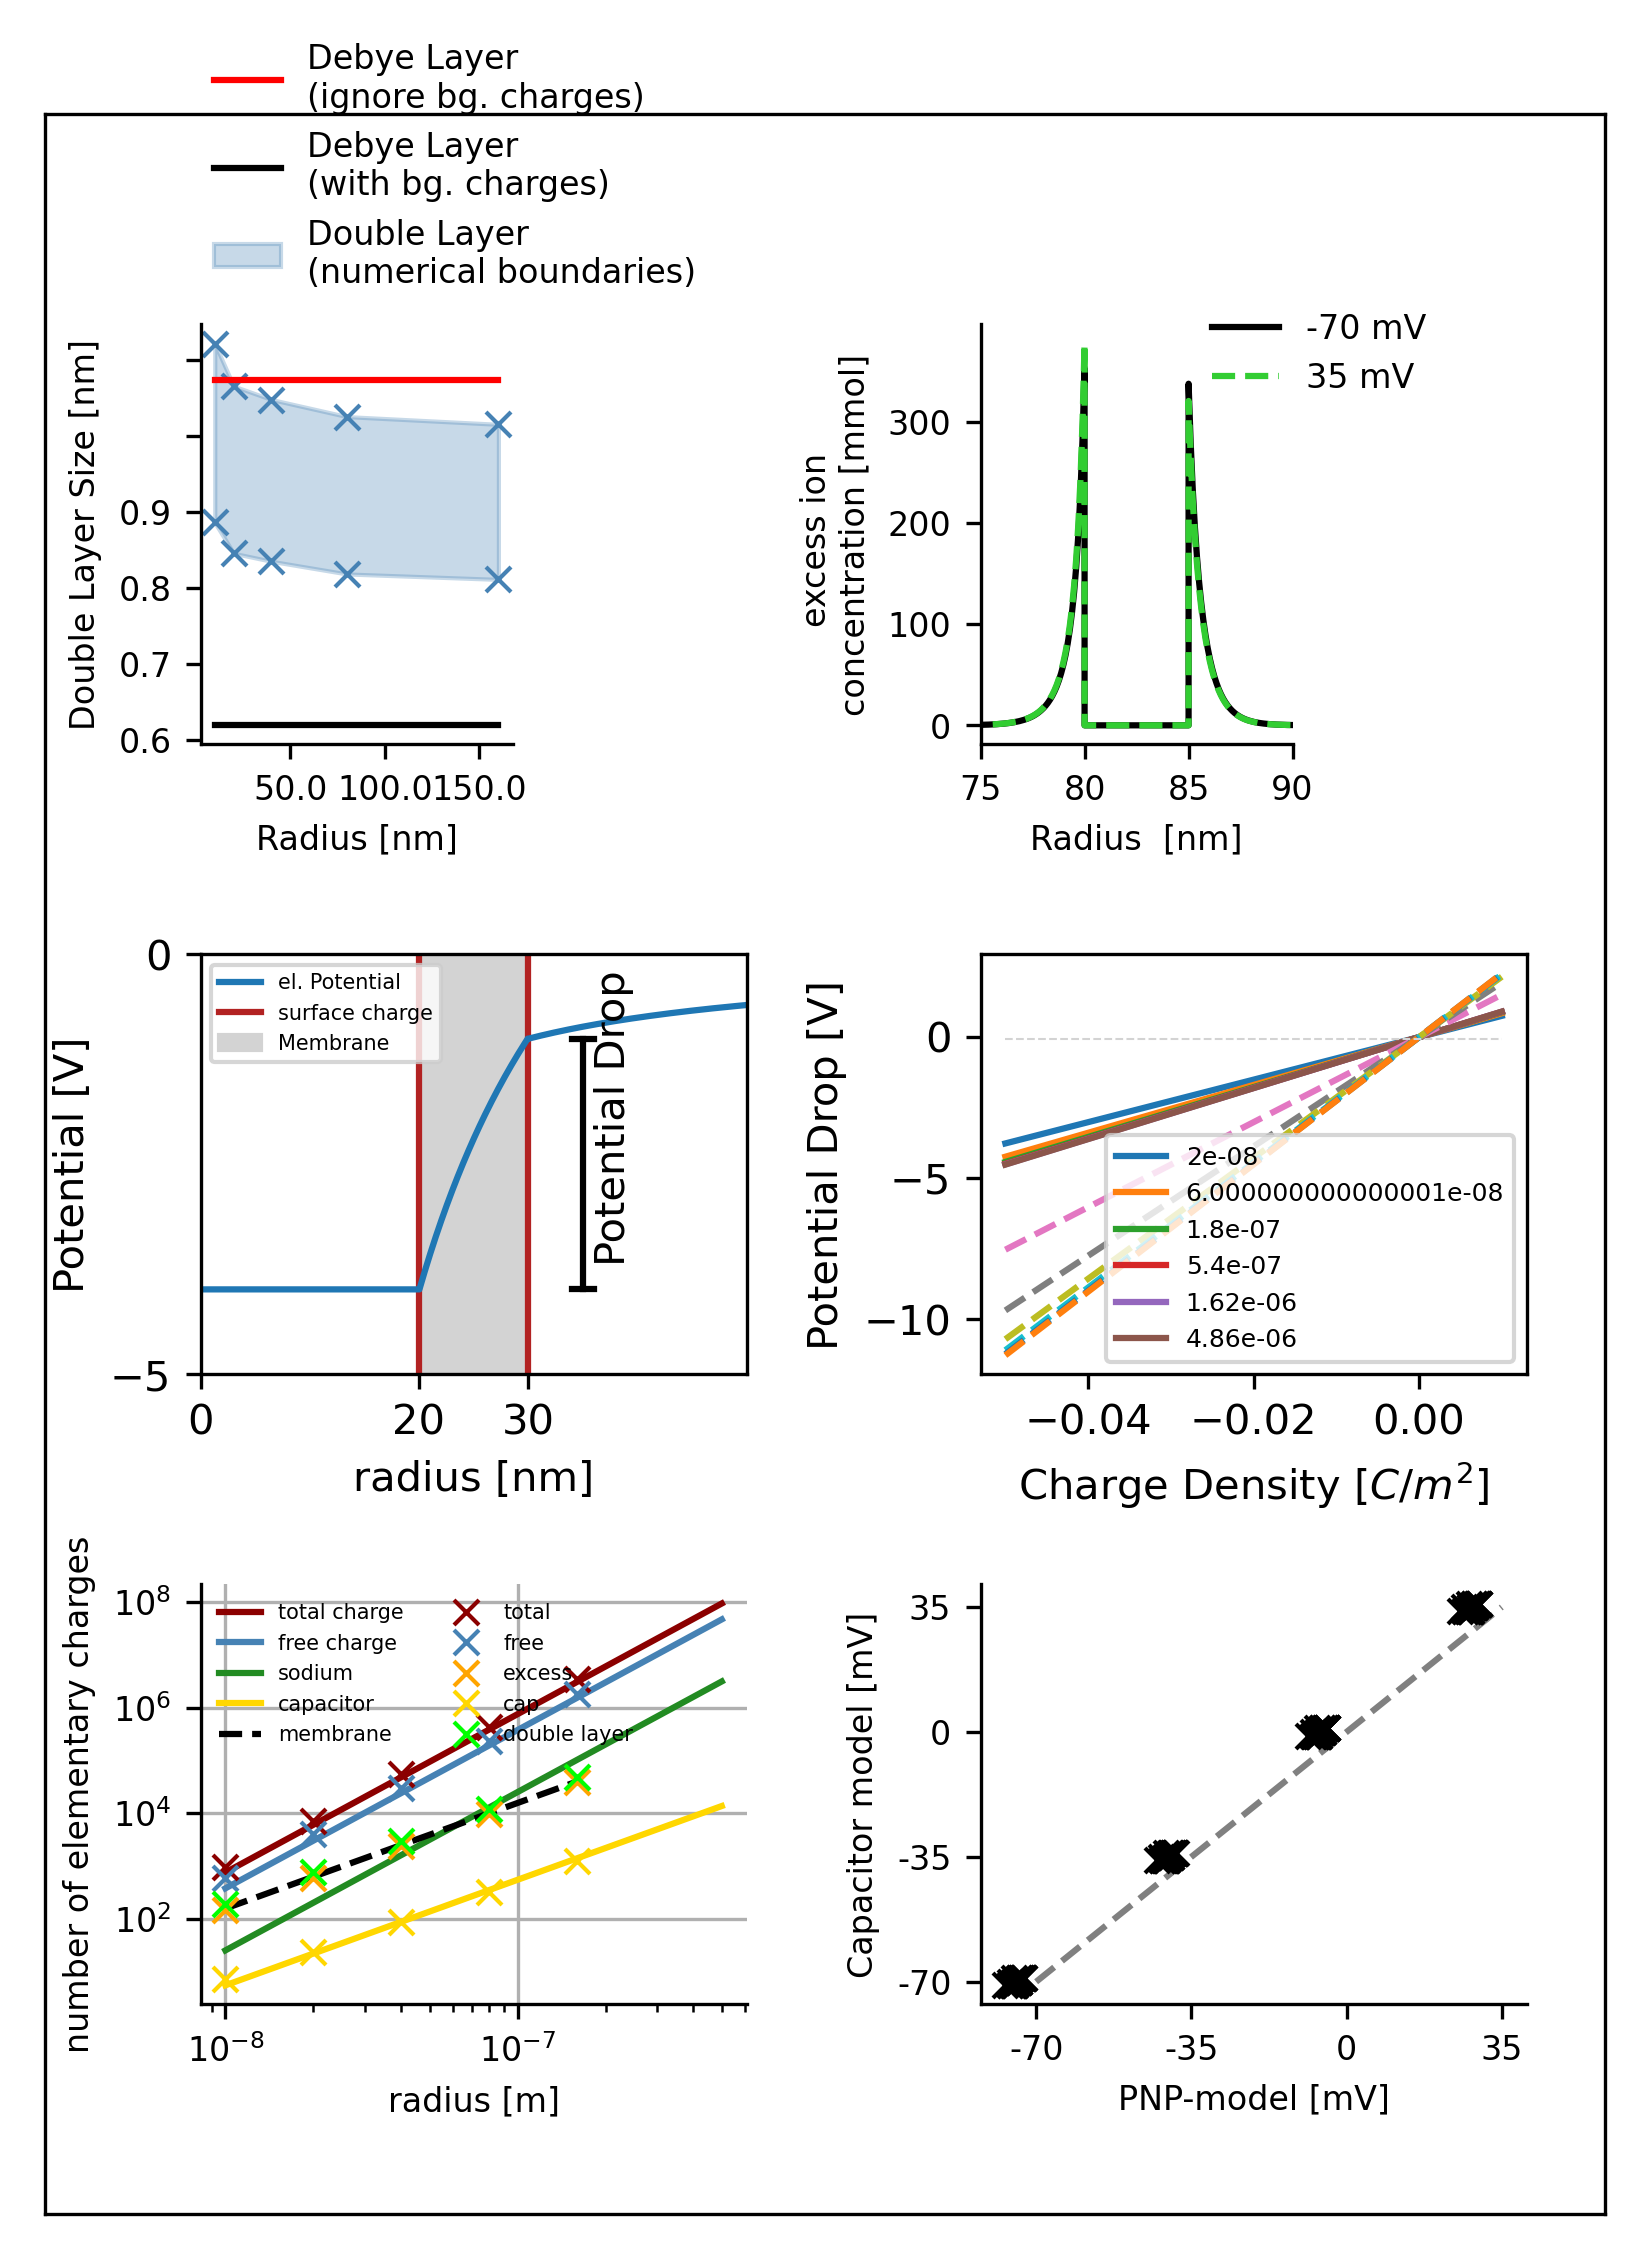

In [126]:
reload(fgs)

fig_5 = plt.figure(figsize=(5.2, 7), dpi=300)

############
# A 
pos = [0.1,0.7, 0.2,0.2]
param_dict = {'membrane_potential': -0.07}
ids = an.search_index(df, param_dict)
df_dl = df.loc[ids] 
plot_double_layer_size(fig_5, pos, df_dl, x_axis='radius')




#################
# B
id1 = an.search_index(df, {'r_in': 80e-9, 'membrane_potential':-0.07, 'domain': 'head'})
id2 = an.search_index(df, {'r_in': 80e-9, 'membrane_potential':0.035, 'domain': 'head'})

ids = np.concatenate((id1 , id2))
df_dl = df.loc[ids] 
plot_excess_charge_distributions(fig_5, [0.6,0.7,0.2,0.2], df_dl, ids)

############################
# C&D

pos1 = [0.1, 0.4, 0.35, 0.2]
pos2 = [0.6, 0.4, 0.35, 0.2]
fgs.potential_drop_through_membrane_charge(fig_5, pos1, pos2)

##########################
# E 

param_dict = {'membrane_potential': -0.07, 'domain': 'head'}
ids = an.search_index(df, param_dict)    


param_dict = {'membrane_potential': -0.07, 'domain': 'head'}
param_dict_depol = {'membrane_potential': 0.0, 'domain': 'head'}

ids = an.search_index(df, param_dict)
cap_ids = an.search_index(df, param_dict_depol)
all_ids = np.concatenate((ids, cap_ids))

df_tmp = df.loc[all_ids]



pos = [0.1, 0.1, 0.35, 0.2]
number_of_charges_vs_radius(fig_5, pos, df_tmp)

###########################
# F
plot_v_mem_cap_vs_pnp(fig_5, [0.6,0.1, 0.35,0.2], df)

###################
# frame
ax_frame = fig_5.add_axes([0,0,1,1])
ax_frame.set_xticks([])
ax_frame.set_yticks([])
ax_frame.set_facecolor('none')

plt.show()

In [46]:
id_tmp = an.search_index(df, {'membrane_potential': -0.069, 'r_in':20e-9})
df.loc[id_tmp, 'r_in']

2    2.000000e-08
Name: r_in, dtype: float64

In [47]:
id_1 = an.search_index(df, {'domain':'head', 'r_in':20e-9, 'membrane_potential':-0.071})[0]
id_2 = an.search_index(df, {'domain':'head', 'r_in':20e-9, 'membrane_potential':-0.069})[0]
capacitance_charges(df, id_1,id_2)
    
    


-1.087985305461415e-19

In [48]:
reload(an)
excess_charge(df, 3, side='intracellular')


9.821141244607131e-17

In [11]:
reload(an)

an.membrane_charge(df, 3)

-1.0053096491487339e-16

In [12]:
an.double_layer_free_charge(df, 3)


1.2282820582124467e-16

In [21]:
reload(an)
an.free_charge(df, 3)

6.580945006656714e-16

In [16]:
reload(an)
an.total_charge(df, 3)

1.159609449628024e-15

# Figure 6

## Capacitance
The capacitance can be computed as C = dQ/dU

Does the membran capacity depend on the surface charge density on the membrane?
If yes this could somehow compensate strong influx of ions (buffering of ions)
If no, ion influx through synapse that must immeadiately be compensated by ion outflux through neck, otherwise membrane potential will suddenly increase and stop ion current through synapse.

NameError: name 'an' is not defined

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


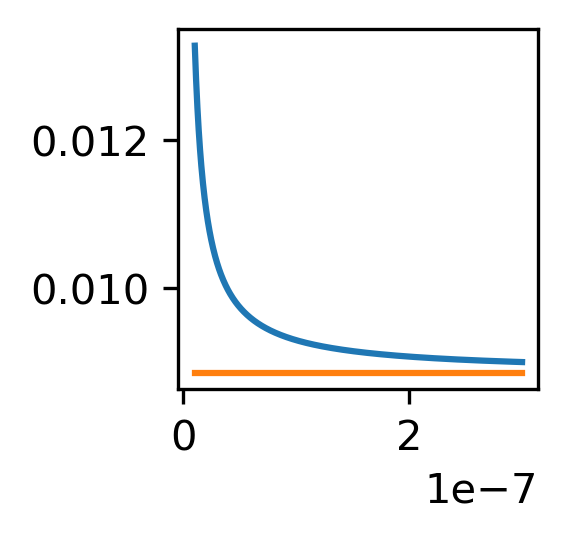

In [6]:
def cylindrical_capacitance_theory(r, d=5.e-9, eps_r=5.):
    """
    capacitance per unit length
    """
    eps_0 = float(constants['eps_0'])
    l = 1.e-6   # length, arbitrary
    
    a = r  # inner radius
    b = r + d  # outer radius
    surface = 2 * np.pi * a * l
    c = 2. * np.pi * eps_0 * eps_r * l/ np.log(b/a)
    c = c/ surface # per unit length, actually not needed if l=1.
    return c
    
def spherical_capacitance_theory(r, d=5e-9, eps_r=5.):
    """
    capacitance normilaized by INTRACELLULAR surface
    """
    eps_0 = float(constants['eps_0'])

    
    surface = 4 * np.pi * np.square(r)
    c = 4. * np.pi * eps_0 * eps_r / (1./r - 1./(r+d) )
    c_surf = c/surface
    return c_surf

def plate_capacitor_theory(r, d=5e-9, eps_r=5.):
    eps_0 = float(constants['eps_0'])
    
    c_surf = np.ones(np.size(r))
    c_surf = c_surf * eps_0 * eps_r / d
    return c_surf
    
def mebrane_capacitance_per_surface(df, id_1, id_2, side='intracellular'):
    # TODO compare parameters of both domains
    
    if side == 'intracellular':
        r = df.loc[id_1, 'r_in']
    else:
        raise AssertionError('extracellular not yet implemented')
    
    if df.loc[id_1, 'domain'] == 'head':
        v_mem_1 = df.loc[id_1, 'membrane_potential']
        v_mem_2 = df.loc[id_2, 'membrane_potential']
        dV = np.abs(v_mem_1 - v_mem_2)
        surface = 4. * np.pi * np.square(r)
        dQ = an.capacitance_charges(df, id_1, id_2)
        c = dQ / dV /surface 
        
    if df.loc[id_1, 'domain'] == 'neck':
        v_mem_1 = df.loc[id_1, 'membrane_potential']
        v_mem_2 = df.loc[id_2, 'membrane_potential']
        dV = np.abs(v_mem_1 - v_mem_2)
        
        
        circumfence = 2. * np.pi * r
        dQ = an.capacitance_charges(df, id_1, id_2)
        c = dQ / dV / circumfence 
    
    return c

def plot_membrane_cap(fig, pos, domain='head'):
    ax = fig.add_axes(pos)
    
    r = np.linspace(10e-9, 300e-9, 1000, endpoint=True)
    if domain == 'head':
        ax.plot(r, spherical_capacitance_theory(r), label='spherical capacitor')
    elif domain == 'neck':
        ax.plot(r, cylindrical_capacitance_theory(r), label='cylindrical capacitor')
    ax.plot(r, plate_capacitor_theory(r), label='plate capacitor')

    
    
    colors=['k', 'r', 'g', 'b']

    if domain == 'head':
        radii = [10,20, 40, 80, 160]
    elif domain == 'neck':
        radii = [10,20, 40, 80]
    for j, v in enumerate([-0.07, -0.035, 0.0, 0.035]):
        v_max = round(v + 0.001, 5)
        v_min = round(v - 0.001, 5)

        r_list = []
        cap_list = []

        for r_i in radii:
            r_in = r_i * 1e-9

            id_1 = an.search_index(df, {'domain':domain, 'r_in':r_in, 'membrane_potential':v_max})[0]
            id_2 = an.search_index(df, {'domain':domain, 'r_in':r_in, 'membrane_potential':v_min})[0]
            print(id_1)
            c = np.abs(mebrane_capacitance_per_surface(df, id_1, id_2))

            r_list.append(r_in)
            cap_list.append(c)

        ax.plot(r_list, cap_list, 'rx', color=colors[j], lw=.5, zorder=5,
                 ms=3., ls='--', label='PNP, $v_{mem}$ = '+str(int(v*1000))+' mV')
        
    x_ticklabels = np.array(ax.get_xticks() * 1.e9, dtype=np.int)
    ax.set_xticklabels(x_ticklabels)
    ax.set_xlabel('$R_{in}$ [nm]')

    ax.set_ylabel('Capacitance [F/$m^2$]')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([0.008, 0.014])
    ax.set_title(domain)
    
    ax.legend(fontsize=4, frameon=False)
    
#####################
fig_cap = plt.figure(figsize=(4., 1.5), dpi=300)

plot_membrane_cap(fig_cap, [0.1, 0.1, 0.3, 0.8])
plot_membrane_cap(fig_cap, [0.6, 0.1, 0.3, 0.8], domain='neck')

plt.show()


# Membrane capacitance

- radius dependence can be explained by spherical capacitor formular
- there is no dependenc on the membrane voltage (only at r=10 nm)
- TODO check dependence on permittivity

# Neck resitance

The neck resistance can be computed as 1/sigma
sigma conductivity

sigma ~ D * cuml_charge * A  / L / (k_B * T)
L:length
A: cross-section pi * r^2

- dependence on radius
- dependence on voltage
- (dependence on permittivity)
- dependence of diffusion time constant
- isotropy? what is the relative contribtution of the boundary layer

Estimate the ration between R_neck with flat concentration profiles and PNP-concnetration profiles

Estimate the ratio of free charges close to the membrane

charge per length in neck domain: 
radius:  2e-08
PNP 2.3475708418019307e-08
cable:  2.1215397614451748e-08
relative increase:  0.1065410530900375
radius:  4e-08
PNP 8.938927767425247e-08
cable:  8.486159045780699e-08
relative increase:  0.053353786937290995
radius:  8e-08
PNP 3.4850912041308783e-07
cable:  3.3944636183122797e-07
relative increase:  0.026698646976118855
radius:  1e-08
PNP 6.430760914201876e-09
cable:  5.303849403612937e-09
relative increase:  0.21247049545209495
charge per length in neck domain: 
double layer size:  7.776346067283613e-10
double layer size:  7.705719381484895e-10
double layer size:  7.607769563500375e-10
double layer size:  8.017854898153856e-10


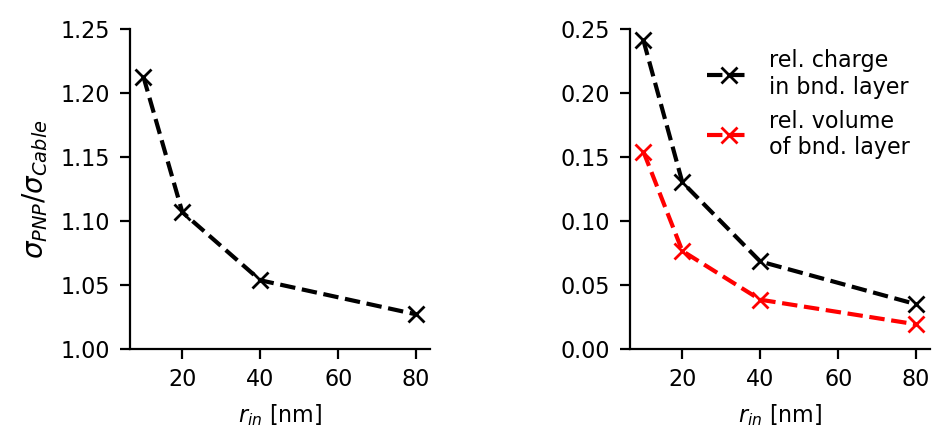

In [18]:
reload(an)

def plot_neck_resistance_change(fig, pos, df, neck_ids):
    ax = fig.add_axes(pos)
    
    N_A = float(constants['N_A'])
    e = float(constants['e'])

    print('charge per length in neck domain: ')
    
    radii = []
    pnp_charge = []
    cable_charge = []

    for neck_id in neck_ids:
        r = df.loc[neck_id, 'r_in']
        print('radius: ',r)
        radii.append(r)

        pnp_charge_per_length = an.free_charge(df, neck_id)
        pnp_charge.append(an.free_charge(df, neck_id))
        print('PNP', pnp_charge_per_length)

        cPos = df.loc[neck_id, 'c_pos_in_0']
        cNeg = df.loc[neck_id, 'c_neg_in_0']
        cable_charge_per_length = (cPos+cNeg)*N_A *e*np.pi*r*r
        print('cable: ', cable_charge_per_length)
        cable_charge.append(cable_charge_per_length)

        rel_change = (pnp_charge_per_length - cable_charge_per_length) / cable_charge_per_length
        print('relative increase: ', rel_change)
     
    # sort by radius
    radii = np.array(radii)
    pnp_charge = np.array(pnp_charge)
    cable_charge = np.array(cable_charge)
    sort_indices = np.argsort(radii)
    radii = radii[sort_indices]
    pnp_charge = pnp_charge[sort_indices]
    cable_charge = cable_charge[sort_indices]
    
    #ax.plot(radii, pnp_charge)
    #ax.plot(radii, cable_charge)
    ax.plot(radii, np.array(pnp_charge)/np.array(cable_charge), 'kx', ls='--')
    
    #####
    # style
    ax.set_ylim(1., 1.25)
    ax.tick_params(labelsize=8)
    
    x_ticklables = np.array(ax.get_xticks() * 1.e9, dtype=np.int)
    ax.set_xticklabels(x_ticklables)
    ax.set_xlabel('$r_{in}$ [nm]', fontsize = 8)
    ax.set_ylabel('$\sigma_{PNP}$/$\sigma_{Cable}$')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
def plot_rel_charge_in_bnd_layer(fig, pos, df, neck_ids):
    
    dl_factor = 1.  # mulitplicative scale of debye layer size
    
    ax = fig.add_axes(pos)
    
    N_A = float(constants['N_A'])
    e = float(constants['e'])

    print('charge per length in neck domain: ')
    
    radii = []
    bnd_charge = []
    intracell_charge = []
    dl_size = []
    
    for neck_id in neck_ids:
        dls = np.mean(an.measure_double_layer_size(df, neck_id, side='intracellular')) * dl_factor
        dl_size.append(dls)
        bnd_charge.append(an.double_layer_free_charge(df, neck_id, dl_factor=dl_factor))
        radii.append(df.loc[neck_id, 'r_in'])
        intracell_charge.append(an.free_charge(df, neck_id))
        
    radii = np.array(radii)
    bnd_charge = np.array(bnd_charge)
    intracell_charge = np.array(intracell_charge)
    dl_size = np.array(dl_size)
    # sort by radius
    sort_indices = np.argsort(radii)
    radii = radii[sort_indices]
    bnd_charge = bnd_charge[sort_indices]
    intracell_charge = intracell_charge[sort_indices]
    dl_size = dl_size[sort_indices]
    
    ax.plot(radii, bnd_charge/intracell_charge, 'kx', label='rel. charge \nin bnd. layer', ls='--')
    
    
    
    dl_volume = np.square(radii) - np.square(radii - dl_size)
    volume_ratio = dl_volume / np.square(radii)
    ax.plot(radii, volume_ratio, 'rx', label='rel. volume \nof bnd. layer', ls='--')
    
    ###### style
    ax.set_ylim(0, 0.25)
    ax.legend(fontsize=8, frameon=False)
    
    ax.tick_params(labelsize=8)
    
    x_ticklables = np.array(ax.get_xticks() * 1.e9, dtype=np.int)
    ax.set_xticklabels(x_ticklables)
    ax.set_xlabel('$r_{in}$ [nm]', fontsize=8)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
#######################

neck_ids = an.search_index(df, {'domain':'neck', 'membrane_potential':-0.07})    
fig = plt.figure(figsize=(5,2), dpi=200)

plot_neck_resistance_change(fig, [0.1,0.1,0.3,0.8], df, neck_ids)

plot_rel_charge_in_bnd_layer(fig, [0.6, 0.1, 0.3, 0.8], df, neck_ids)

plt.show()

[]

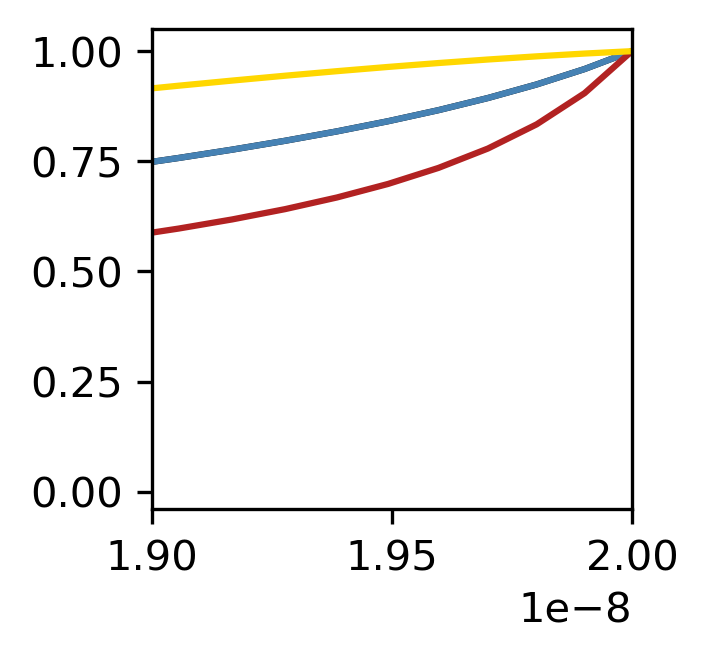

In [70]:
def plot_individual_ion_concetration(fig, pos, df, dom_id, ion_species=None, c0=None):

    ax= fig.add_axes(pos)
    
    # constants
    e = np.float(constants['e'])
    k_B = np.float(constants['k_B'])
    T = np.float(constants['T'])
    
    # load results, potential and grid points
    domain = fio.load_domain_from_df(df, dom_id)    
    res_in = domain.get_res_in()    
    pot = domain.get_electric_potential()[:res_in]    
    # c_pos = domain.get_concentration_positive()[:res_in]    
    radius = domain.get_grid_points()[:res_in]    
    phi_0 = pot[0]
    
    colors = ['k', 'steelblue', 'firebrick', 'gold']
    
    for i, species in enumerate(ion_species):
        # charge number of ion species
        if species == 'Ca':
            z = 2
        elif species == 'Na':
            z = 1
        elif species == 'Cl':
            z = -1
        elif species == 'K':
            z = 1

        
        c = c0[i] * np.exp(-z*e/k_B/T*(pot-phi_0))

        ####################ax = fig.add_axes(pos)
        
        c_cum = c / np.sum(c)
        c_cum = np.cumsum(c_cum)
        c__cum = c_cum/c_cum[-1]
        
        ax.plot(radius, c_cum, c=colors[i])
        #ax.plot(radius, c)
    #ax.plot(radius, c_pos, 'r--')
    
    # style
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlim([19e-9, 20e-9])
    
##
fig = plt.figure(dpi=300, figsize=(2,2))

plot_individual_ion_concetration(fig, [0.1,0.1, 0.8,0.8],df, 61, 
                                 ion_species=['Na', 'K', 'Ca', 'Cl'], c0=[140, 15, 0.1,5])

plt.plot()

# Discussion

## How many charges entry the spine during a single synaptic activation

In [22]:
e = float(constants['e'])
i_syn = 1e-12  # synaptic current TODO check what is a good approximations
dt = 5e-3  # time of epsp

N_charges = i_syn / e * dt
print(N_charges)

31210.986267166045


## Compartmentalization in FRAP experiments
neck resitance can be affected by diffusion and charge/length 
effective volume or cross-section changed by volume taken by macromolecules

## Effect of deviations from spherical/polar symmetry

### Compare electric field in resting state and depolarized state because e-field controls ion-channels

####  The current state of the ion-channels is rather determined by the electric field and not by the measured membrane potential. Therefor it si interesting if the field in the membrane correlates exactely with the potential?

If the field is a functio of membrane potential then the field strength where NMDP unblocks can be predicted!

## Calcium accumulation at membrane

## Nernst-Potential
The Nerns-potential is given by
Phi = (k_b T)/(z * e) ln(c/c_0)
Here we compute the fraction c/c_0 that leads to a Nerns-Potential of 0-4.5 V

37.447405329593266
7.385829058321706e-09


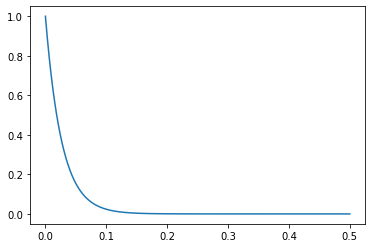

In [30]:
delta_phi_list = np.linspace(0., 0.5, 1000)
charge_number = 1.
const_ebt = np.float(constants['e'] / constants['k_B'] / constants['T'])
print(const_ebt)
rel_c_change = np.exp(-1. * const_ebt * charge_number * delta_phi_list)
print(rel_c_change[-1])
plt.plot(delta_phi_list, rel_c_change)
plt.show()

4 V membrane potential is a bad starting point for optimzation/ soving PNP-equations therefor we search concentrations that make intracelluarl and extracellular domain electroneutral.

In [50]:
# surface charge density of f-actin
surface = 2. * np.pi * 4.e-9 * 4.e-9 
charge = 4 * float(constants['e'])
density = charge /surface
print(density)

0.006374155470830408


In [51]:

qPerMTheory = np.pi * np.square(np.float(r_in)) * (np.float(c_pos_in) + np.float(c_neg_in)) * float(constants['N_A']) * float(constants['e']) * 1.e9 
print(qPerMTheory)

NameError: name 'r_in' is not defined

# Trash

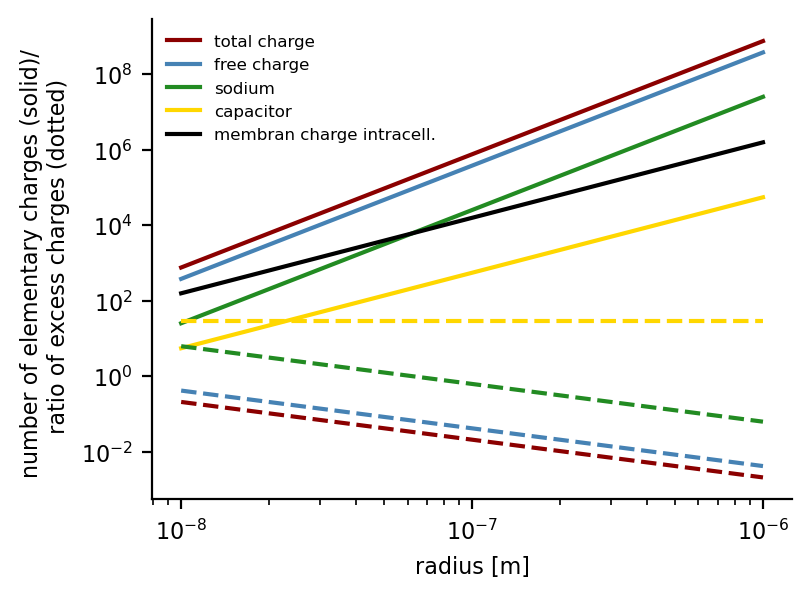

In [51]:


def membrane_charge_vs_intrcell_charge(fig, pos1=[0.1, 0.1, 0.8, 0.8], pos2=[0.6, 0.1, 0.35, 0.8] ):
    
    e =  np.float(constants['e'])
    N_A = np.float(constants['N_A'])
    
    min_cell_radius = 10.e-9  # 50 nm
    max_cell_radius = 1000.e-9   # 1 \mu m
    radius = np.linspace(min_cell_radius, max_cell_radius, 100)
    
    surface_area = 4. * np.pi * np.square(radius)
    volume = 4./3. * np.pi * np.power(radius, 3)
    
    # surface charge density membrane
    c_mem = 0.02 / e  # 0.02 C/m^2 / 1.6022e-19 C  = number of elementary charges per unit surface
    # volume charge density intracellular
    total_charge_density = 300. * N_A
    free_charge_density = 150. * N_A # mol/m^3 = mmol (1.e-3 mol/liter)
    sodium_charge_density = 10 * N_A
    
    # usually to estimate the number of uncompensated charges a simple capacitor model is used
    specific_membrane_capacitance=1.e-2 # 1 muF / cm^2 = 0.01 F/m^2 
    membrane_potential= -0.07  # 70 mV
    membrane_capacitance = specific_membrane_capacitance * surface_area
    
    
    total_number_of_ions = volume * total_charge_density 
    number_of_free_ions = volume * free_charge_density
    number_of_sodium_ions = volume *sodium_charge_density
    number_of_membrane_e_charges = c_mem * surface_area
    number_of_capacitor_ions = np.abs(membrane_capacitance * membrane_potential / e )
    
    ax1 = fig.add_axes(pos1)
    ax1.plot(radius, total_number_of_ions, color='darkred', label='total charge')
    ax1.plot(radius, number_of_free_ions, color='steelblue', label='free charge')
    ax1.plot(radius, number_of_sodium_ions, color='forestgreen', label='sodium')
    ax1.plot(radius, number_of_capacitor_ions, color='gold', label='capacitor')
    ax1.plot(radius, number_of_membrane_e_charges, color='k', label='membran charge intracell.')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    
    #ax2 = fig.add_axes(pos2)
    ax1.plot(radius, number_of_membrane_e_charges/total_number_of_ions, color='darkred', ls='--')
    ax1.plot(radius, number_of_membrane_e_charges/number_of_free_ions, color='steelblue', ls='--')
    ax1.plot(radius, number_of_membrane_e_charges/number_of_sodium_ions, color='forestgreen', ls='--')
    ax1.plot(radius, number_of_membrane_e_charges/number_of_capacitor_ions, color='gold', ls='--')
    
    #ax2.set_yscale('log')
    #ax2.set_xscale('log')
    
    # labels 
    ax1.set_xlabel('radius [m]', fontsize=8)
    ax1.set_ylabel('number of elementary charges (solid)/ \n ratio of excess charges (dotted)', fontsize=8)
    ax1.tick_params('both', labelsize=8)
    
    # legend
    ax1.legend(fontsize=6, frameon=False)
    
    # style
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    #print('radius: ', radius[:11])
    #print((number_of_membrane_e_charges/number_of_free_ions)[:11])
    #print(number_of_membrane_e_charges/number_of_capacitor_ions)
####################
fig = plt.figure(dpi=200, figsize=(4,3))
membrane_charge_vs_intrcell_charge(fig)
plt.show()